# Salary Prediction

### THE SCUBA SQUAD

### *Team Members*
**1. Subramanya K S    -  4JN18IS100**<br>
**2. Vivek srinivasan  -  4JN18IS112**<br>
**3. Raghuveera V      -  4JN18IS067**<br>
**4. Puneeth K S       -  4JN18IS065**<br>
**5. Sanath M C        -  4JN18IS082**<br>

***importing required python library***

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

***Reading the dataset***

In [4]:
data = pd.read_csv('Salary_Data.csv')
df = data.copy()
# view the first five rows
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
# view the last five rows
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


***Data visualization***

In [6]:
#getting the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
#describing the dataset
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
#rows and column in dataset
df.shape

(30, 2)

In [9]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [10]:
#check for correlation
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


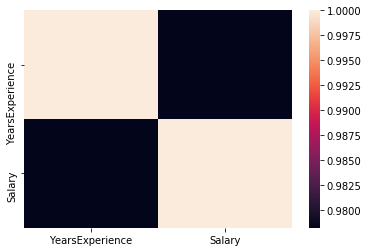

In [11]:
#heatmap to analyse correlation
sns.heatmap(df.corr())

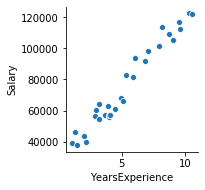

In [12]:
sns.pairplot(y_vars = 'Salary', x_vars = 'YearsExperience' ,data = df)

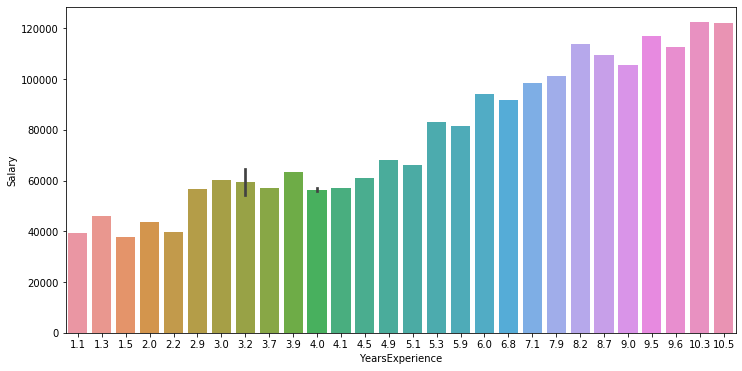

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x='YearsExperience', y ='Salary', data = df)

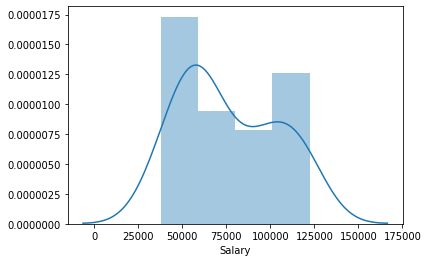

In [14]:
sns.distplot(df['Salary'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A5381EE888>,
      dtype=object)

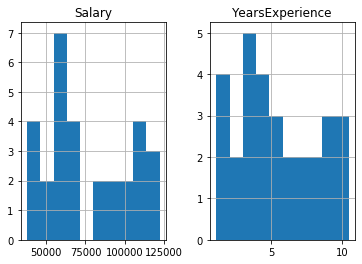

In [15]:
df.hist()

***Data cleaning***

In [16]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [17]:
# drop duplicate
df = df.drop_duplicates()
df.shape

(30, 2)

***create depoendent and independent variable***

In [18]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values

In [19]:
print(X.shape)
print(Y.shape)

(30, 1)
(30,)


In [20]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [21]:
Y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

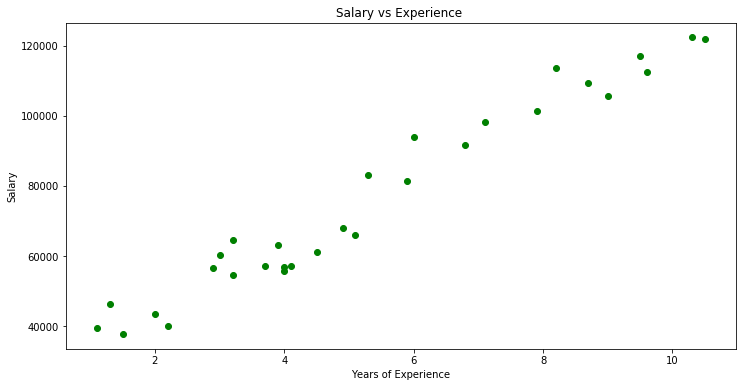

In [22]:
plt.figure(figsize=(12,6))
plt.scatter(X, Y, color = 'green')
plt.title('Salary vs Experience ')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Visualize data before training the module

***Split the dataset into training and testing set*** 

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state =10)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(24, 1)
(6, 1)
(24,)
(6,)


***Apply Linear Regression to Training Data***

In [25]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

***Predict the Test set value***

In [26]:
y_pred = (lreg.predict(X_test))
y_pred

array([89715.76498848, 56031.05821174, 53223.99931368, 40124.39112273,
       44802.8226195 , 92522.82388655])

***Compare actual and Predicted Value***

In [27]:
df1 = pd.DataFrame({"Actual":Y_test, "Predicted": y_pred, 'varience':Y_test-y_pred})
df1

,Actual,Predicted,varience
0,91738.0,89715.764988,2022.235012
1,54445.0,56031.058212,-1586.058212
2,56642.0,53223.999314,3418.000686
3,37731.0,40124.391123,-2393.391123
4,43525.0,44802.822619,-1277.822619
5,98273.0,92522.823887,5750.176113


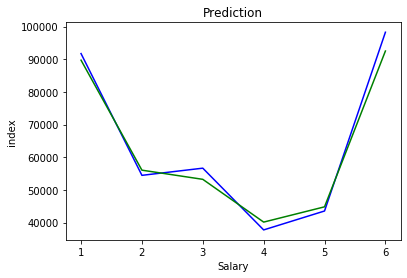

In [28]:
c = [i for i in range (1,len(Y_test)+1,1)]
plt.plot(c,Y_test,color='b',linestyle='-')
plt.plot(c,y_pred,color='g',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

***Prediction***

In [29]:
lregn = lreg.predict([[1.3]])
print(lregn)

[38253.01852402]


***Finding  intercept and co-efficient for linear equation***

In [30]:
print(lreg.intercept_)
print(lreg.coef_)

26089.096632416702
[9356.86299354]


The Linear Regression Equation is:<br>
y = 26089.1+9356.86 * x
<br>or<br>
Salary = 26089.1 + 9356.86 * YearsExperience

***Visualize training set***

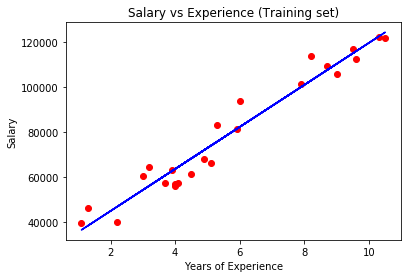

In [31]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, lreg.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

***Visualize testing set***

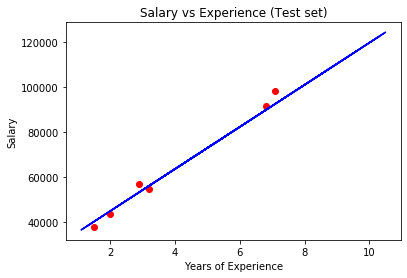

In [32]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, lreg.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

***Evaluation***

finding Root Mean Square Errore, Mean Square Error, Mean Absolute Eroor, R-Square.

In [33]:
print('Mean squared Error = ',metrics.mean_squared_error( Y_test, y_pred))
print('Mean absolute Error = ',metrics.mean_absolute_error( Y_test, y_pred))
print("Root Mean Square error =",np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R square = ',metrics.r2_score(Y_test, y_pred))

Mean squared Error =  9785570.138914311
Mean absolute Error =  2741.2806275420785
Root Mean Square error = 3128.1895944642342
R square =  0.9816423482070253


finding Testing and Training Accuracy

In [34]:
print(f"Training accuracy {round(lreg.score(X_train,Y_train)*100,2)}%")
print(f"Testing accuracy {round(lreg.score(X_test,Y_test)*100,2)}%")

Training accuracy 94.95%
Testing accuracy 98.16%


***------------------------------------------END---------------------------------------------------***